# Let's start with a 1D Example

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import rand

In [2]:
def sigfunc(x):
    return 1.25*np.sin(.4*x) + 1*np.sin(1.5*x-.25)

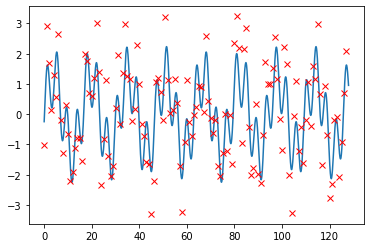

In [22]:
nlevel = 7
nsamp = 2**nlevel
sig = np.array([[t/20,sigfunc(t/20)] for t in range(20*nsamp)])
samp = np.array([sigfunc(t)+3*(rand(1)[0]-.5) for t in range(nsamp)])
plt.plot(sig[:,0],sig[:,1])
plt.plot(range(nsamp),samp,'rx')
plt.show()

In [23]:
def dwt(x):
    L = len(x)
    z = np.zeros(L)
    H = np.int((L-1)/2)
    ix = 0
    ohf = 0
    for i in range(H):
        hf = x[2*i+1] - (x[2*i]+x[2*i+2])/2
        z[i] = 2*x[2*i]+(hf+ohf)/2
        z[i+H+1] = hf
        ohf = hf
    return z

In [24]:
def mdwt(x,n):
    L = len(x)
    if n == 1:
        z = dwt(x)
    else:
        z = np.zeros(L)
        H = np.int(L/2)
        z[0:H] = mdwt(x[0:H],n-1)
        z[H:L] = x[H:L]
    return z

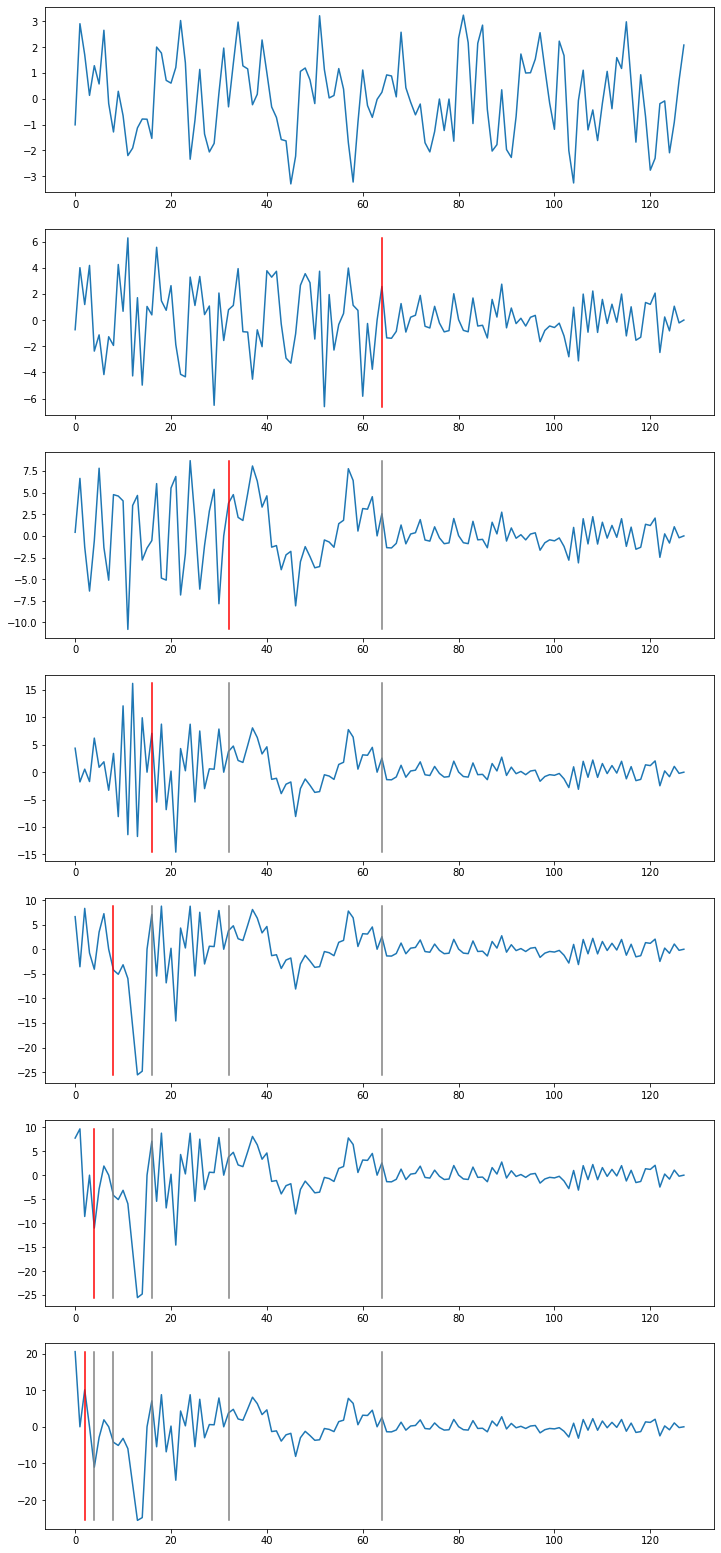

In [25]:
_,ax = plt.subplots(nlevel,figsize=(12,4*nlevel))
ax[0].plot(samp)
u = samp
for i in range(nlevel-1):
    u = mdwt(u,i+1)
    ax[i+1].plot(u)
    X = len(samp)/2
    for j in range(i):
        ax[i+1].plot([X,X],[min(u),max(u)],color='gray')
        X = X/2
    ax[i+1].plot([X,X],[min(u),max(u)],color='red')
plt.show()

# 2D (graphic) Example

In [7]:
from PIL import Image
import math

In [8]:
raw_image = Image.open('StockPhotos/old_grill.jpg')

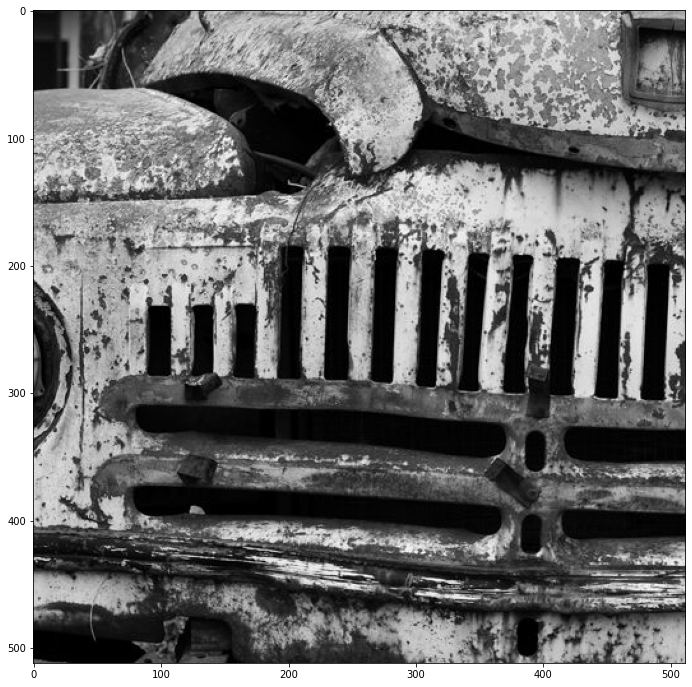

In [9]:
(w,h) = raw_image.getbbox()[2:]
crop = 2**int(math.log(min(w,h),2))
xo = int(w-crop)/4  # yes, this isn't centered
yo = int(h-crop)/4
image = raw_image.crop([xo,yo,xo+crop,yo+crop])
pixels = np.array(image.getdata(0),dtype=np.int).reshape(crop,crop)

plt.subplots(1,1,figsize=(12,12))
plt.imshow(pixels,cmap='gray')
plt.show()

In [10]:
def dwth(x):
    rval = np.array([dwt(r) for r in x])
    return rval

def dwtv(x):
    rval = dwth(x.T)
    return rval.T

In [11]:
def dwt2(x):
    t = dwtv(dwth(x))
    (h,w) = tuple(int(_/2) for _ in t.shape)
    f,ax = plt.subplots(2,2,figsize=(12,12))
    LL = t[:h,:w]
    LH = t[:h,w:]
    HL = t[h:,:w]
    HH = t[h:,w:]
    ax[0,0].imshow(LL,cmap='gray')
    ax[0,1].imshow(LH,cmap='gray')
    ax[1,0].imshow(HL,cmap='gray')
    ax[1,1].imshow(HH,cmap='gray')
    plt.show()
    return (LL,LH,HL,HH)

def join(LL,LH,HL,HH):
    return np.concatenate( (np.concatenate((LL,LH),axis=1), np.concatenate((HL,HH),axis=1)), axis=0 )

## Examine the 4 subbands

Each is independently scaled to show details.   Do not attempt to infer anything from relative intensities.

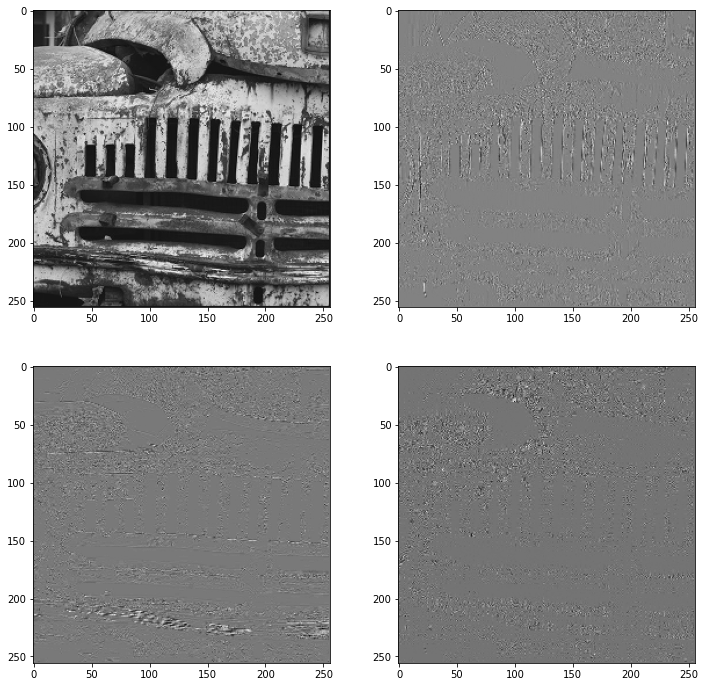

In [12]:
(LL1,LH1,HL1,HH1) = dwt2(pixels)

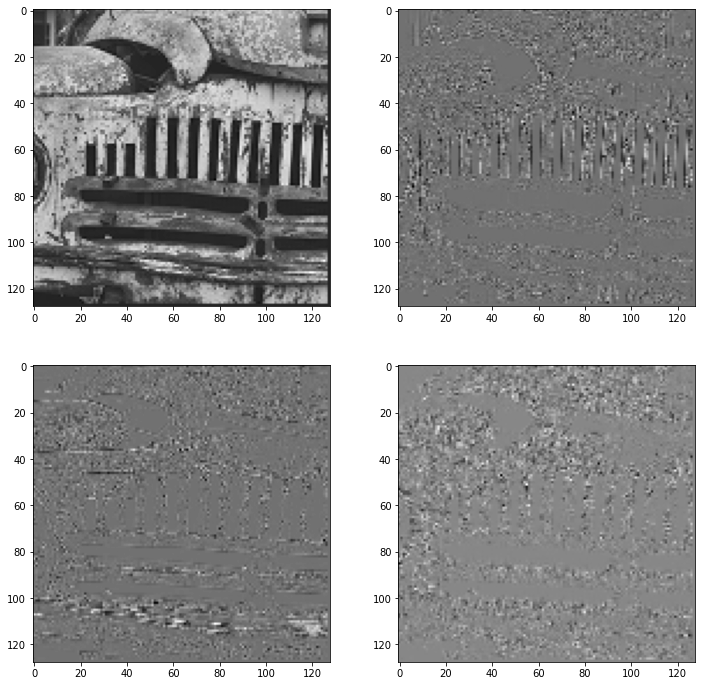

In [13]:
(LL2,LH2,HL2,HH2) = dwt2(LL1)

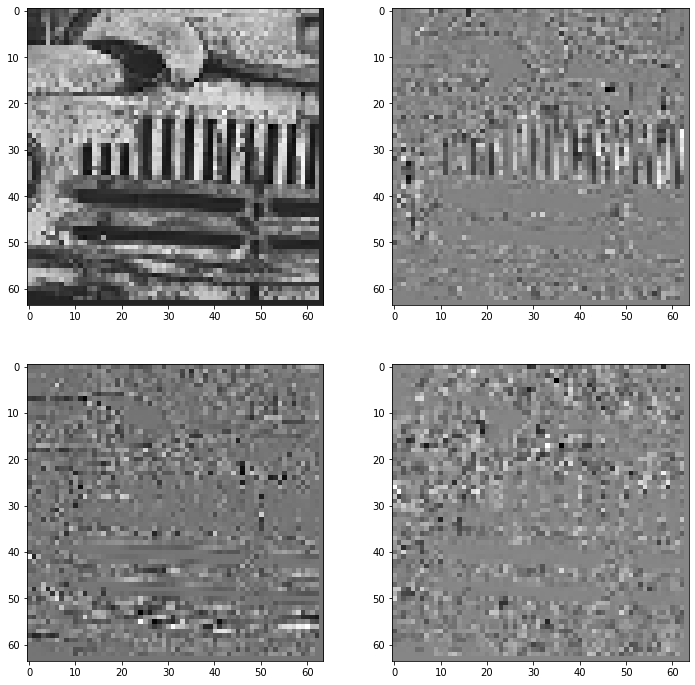

In [14]:
(LL3,LH3,HL3,HH3) = dwt2(LL2)

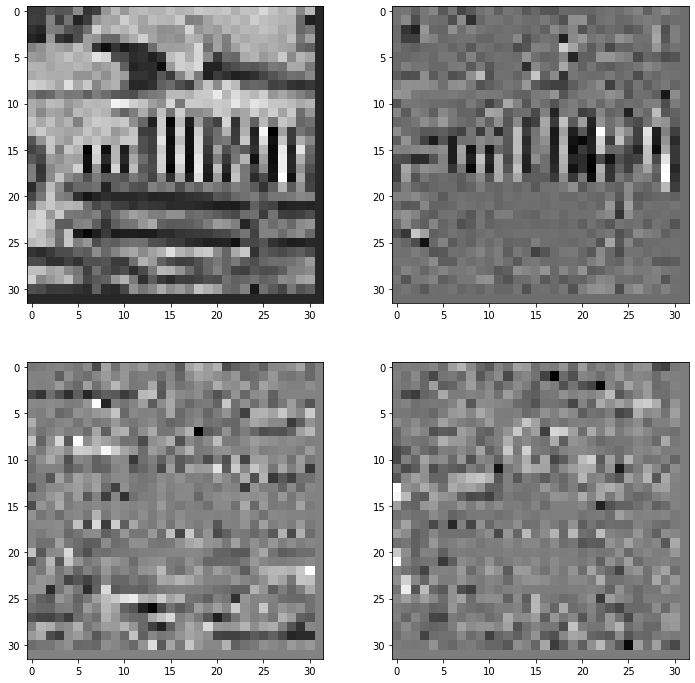

In [15]:
(LL4,LH4,HL4,HH4) = dwt2(LL3)

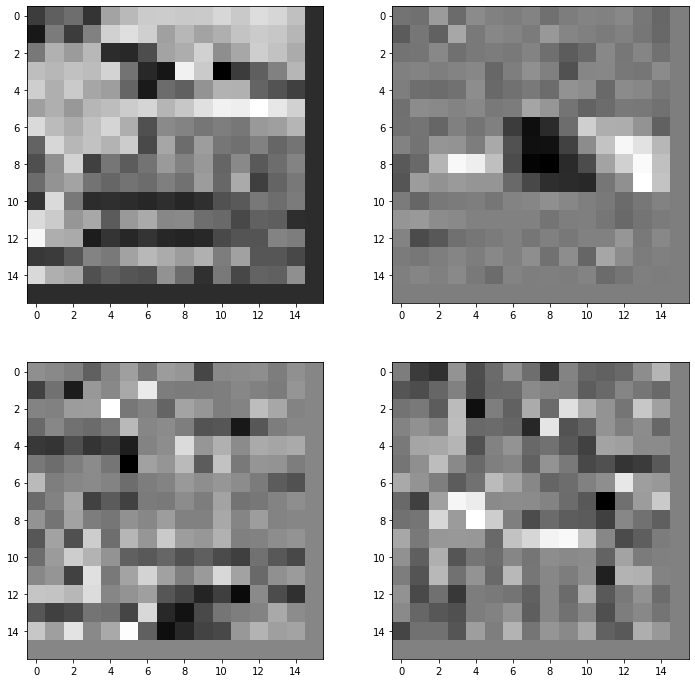

In [16]:
(LL5,LH5,HL5,HH5) = dwt2(LL4)

## Examine subband levels merged into single "image"

All subbands are scaled identically.   Relative intensity is significant.

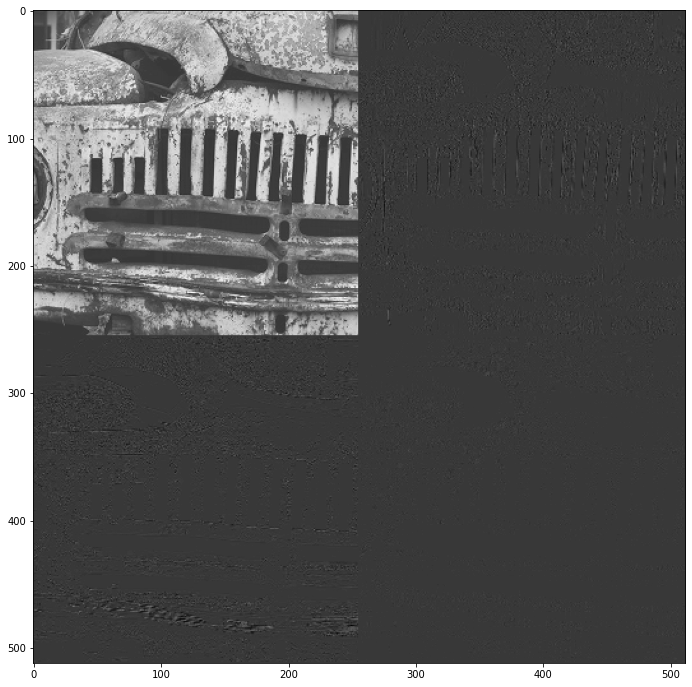

In [17]:
L1 = join(LL1,LH1,HL1,HH1)
plt.subplots(1,1,figsize=(12,12))
plt.imshow(L1,cmap='gray')
plt.show()

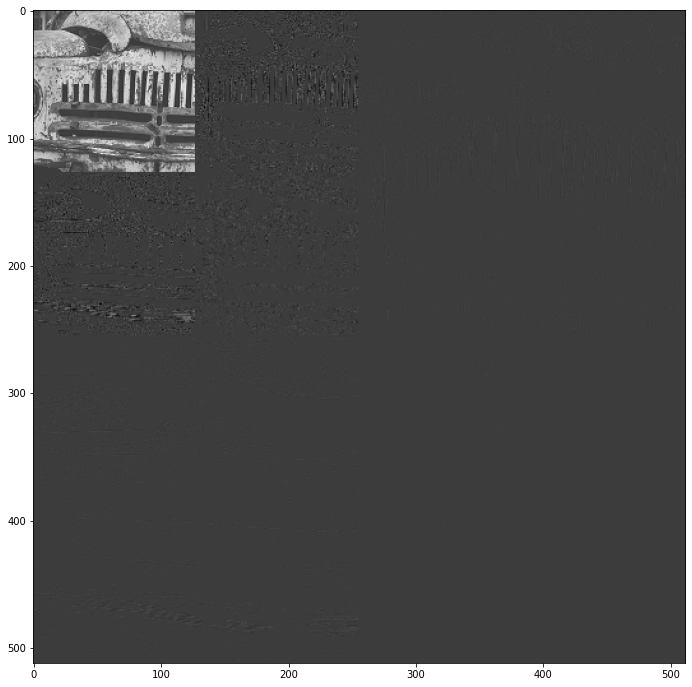

In [18]:
L2 = join(LL2,LH2,HL2,HH2)
L1 = join(L2,LH1,HL1,HH1)
plt.subplots(1,1,figsize=(12,12))
plt.imshow(L1,cmap='gray')
plt.show()

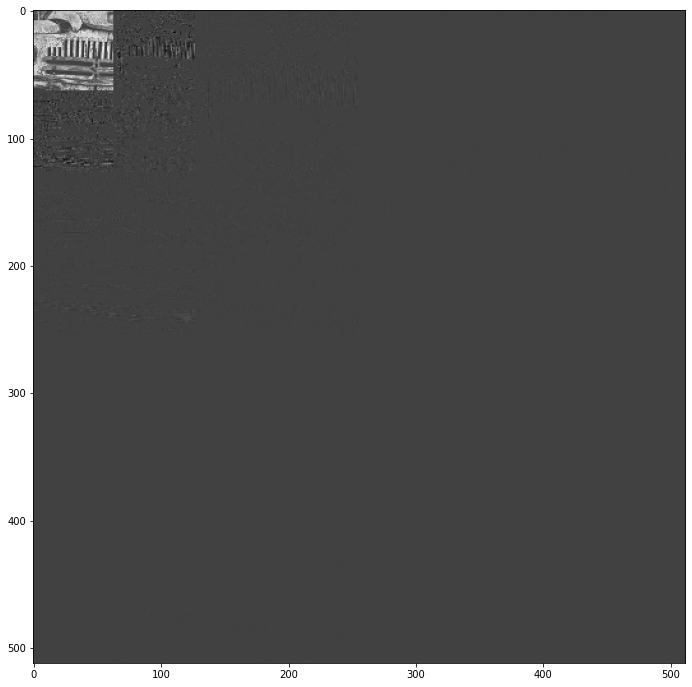

In [19]:
L3 = join(LL3,LH3,HL3,HH3)
L2 = join(L3,LH2,HL2,HH2)
L1 = join(L2,LH1,HL1,HH1)
plt.subplots(1,1,figsize=(12,12))
plt.imshow(L1,cmap='gray')
plt.show()

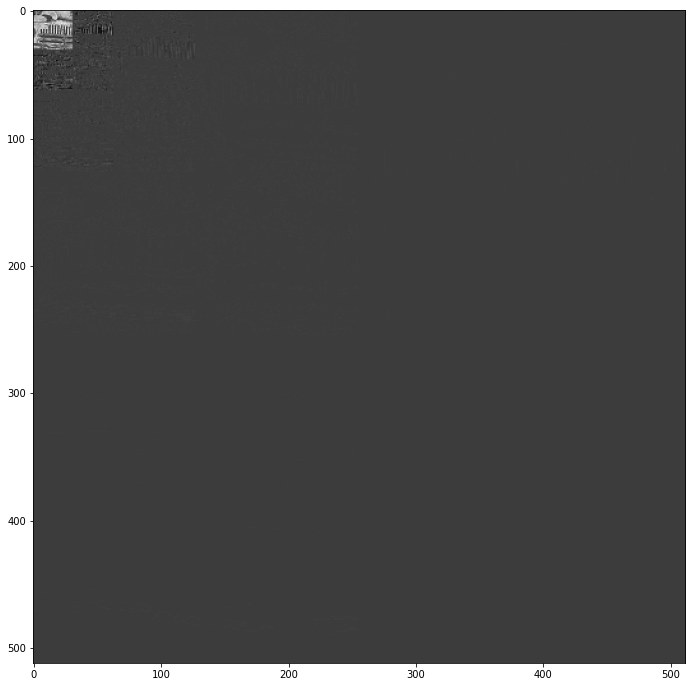

In [21]:
L4 = join(LL4,LH4,HL4,HH4)
L3 = join(L4,LH3,HL3,HH3)
L2 = join(L3,LH2,HL2,HH2)
L1 = join(L2,LH1,HL1,HH1)
plt.subplots(1,1,figsize=(12,12))
plt.imshow(L1,cmap='gray')
plt.show()

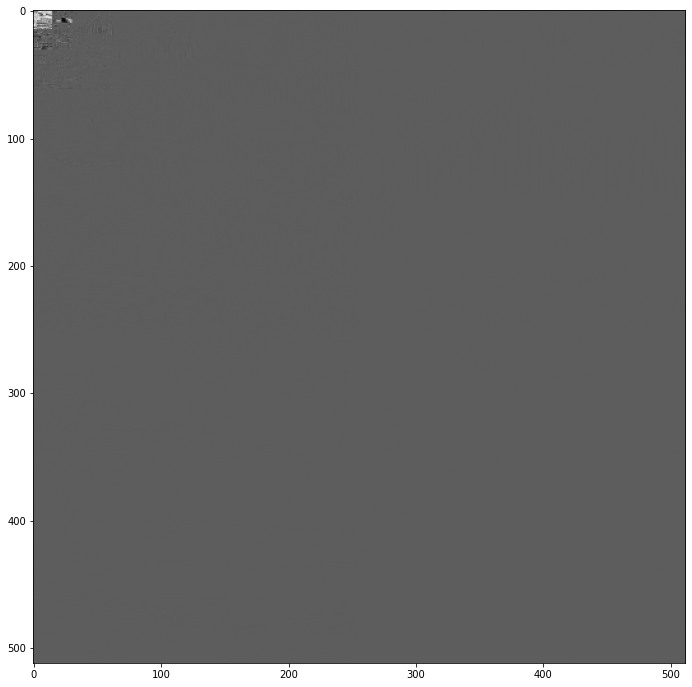

In [20]:
L5 = join(LL5,LH5,HL5,HH5)
L4 = join(L5,LH4,HL4,HH4)
L3 = join(L4,LH3,HL3,HH3)
L2 = join(L3,LH2,HL2,HH2)
L1 = join(L2,LH1,HL1,HH1)
plt.subplots(1,1,figsize=(12,12))
plt.imshow(L1,cmap='gray')
plt.show()